<a href="https://colab.research.google.com/github/leonardogtc/crs-visao-computacional/blob/main/S02_reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Desenvolvimento/Cursos/Visão Computacional Guia Completo/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

## Pré-processamento das imagens

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  # print(path)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L')
    #print(type(imagem))
    imagem_np = np.array(imagem, 'uint8')
    #print(type(imagem_np))
    #print(os.path.split(path)[1])
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

## Treinamento do classificador LBPH

In [ ]:
lbph_classifier = cv.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Reconhecimento de Faces

In [ ]:
lbph_face_classifier = cv.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
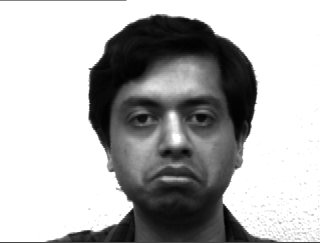

In [ ]:
imagem_np

In [ ]:
imagem_np.shape

(243, 320)

In [ ]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 6.384336446373091)

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

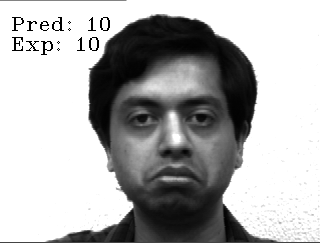

In [ ]:
cv.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)